<a href="https://colab.research.google.com/github/Bao28072002/Churn/blob/main/Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# QUESTION 1:

**EDA:  
Các hành vi của những người dùng đã rời bỏ là gì? Bạn có đề xuất gì cho công ty để giảm số lượng người dùng rời bỏ?**


In [ ]:
data='/content/drive/MyDrive/Portfolio/Machine Learning/final_project/churn_prediction.xlsx'

In [ ]:
df = pd.read_excel(data)

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
#check missing value
missing_value = df.isna().sum()
print(missing_value)


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Check for duplicate
check_dup = df.duplicated().sum()
check_dup

np.int64(0)

In [ ]:
#check unique()
continuous_cols = df.select_dtypes(include=['int', 'float64']).columns
unique_value_in_continuous_col = df[continuous_cols].nunique()
print(unique_value_in_continuous_col)

CustomerID                     5630
Churn                             2
Tenure                           36
CityTier                          3
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64


In [ ]:
# Replace missing columns with median
cols_missing = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in cols_missing:
  df[col].fillna(value= df[col].median(), inplace=True)

/tmp/ipython-input-621805492.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value= df[col].median(), inplace=True)


In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

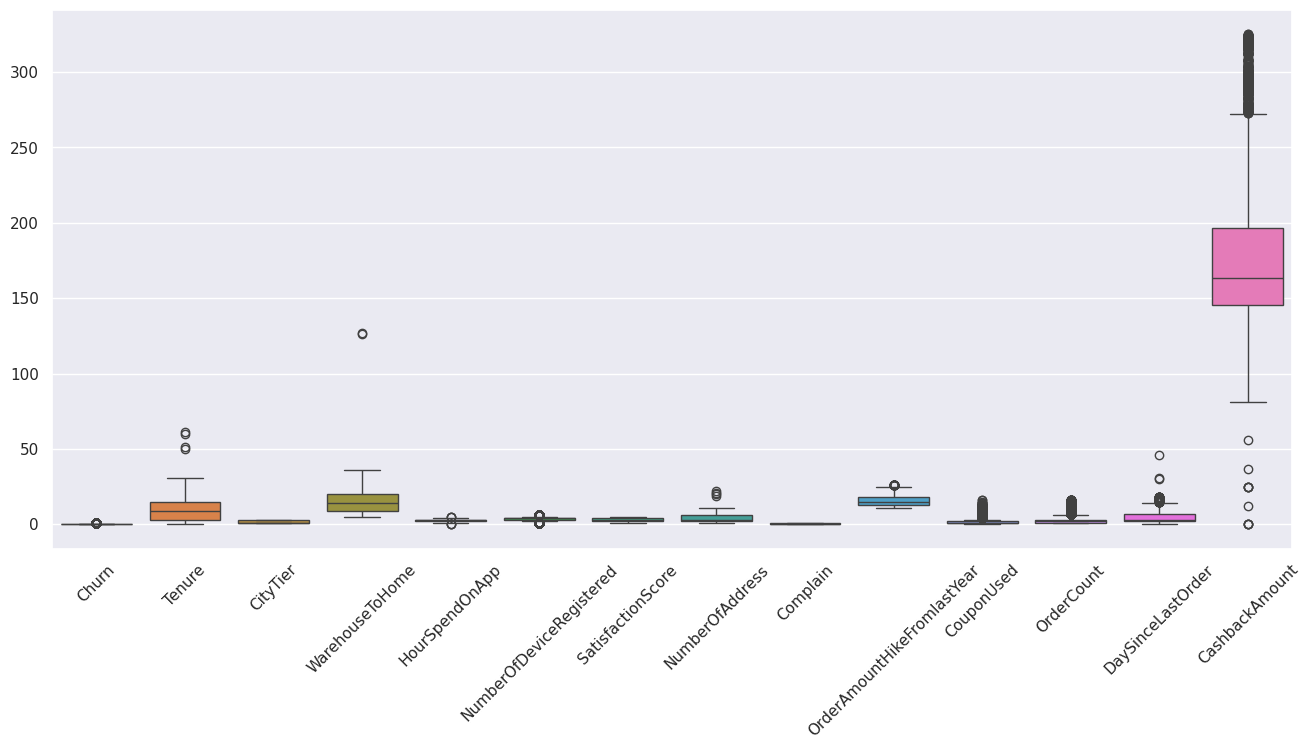

In [ ]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
cat = df.select_dtypes(include='object').columns
for col in cat:
    print(df[col].value_counts())


PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


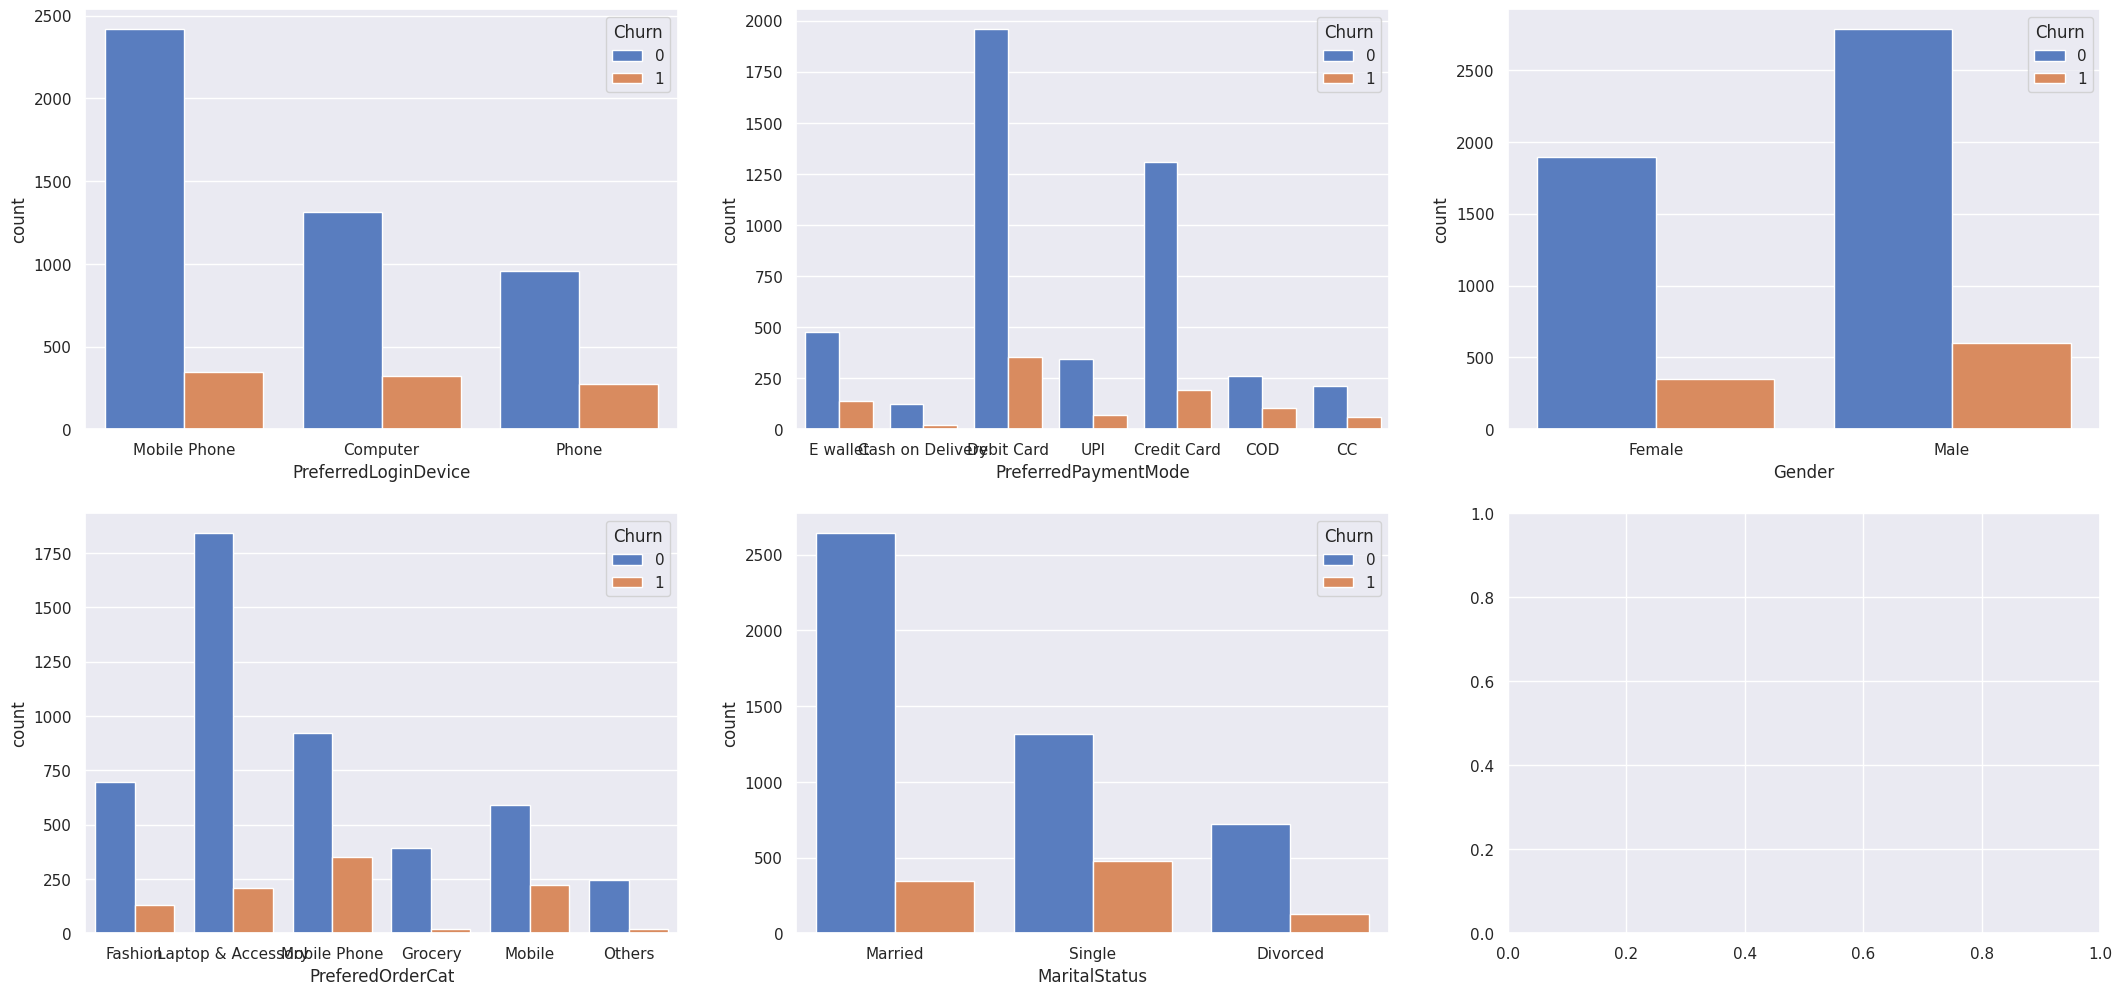

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

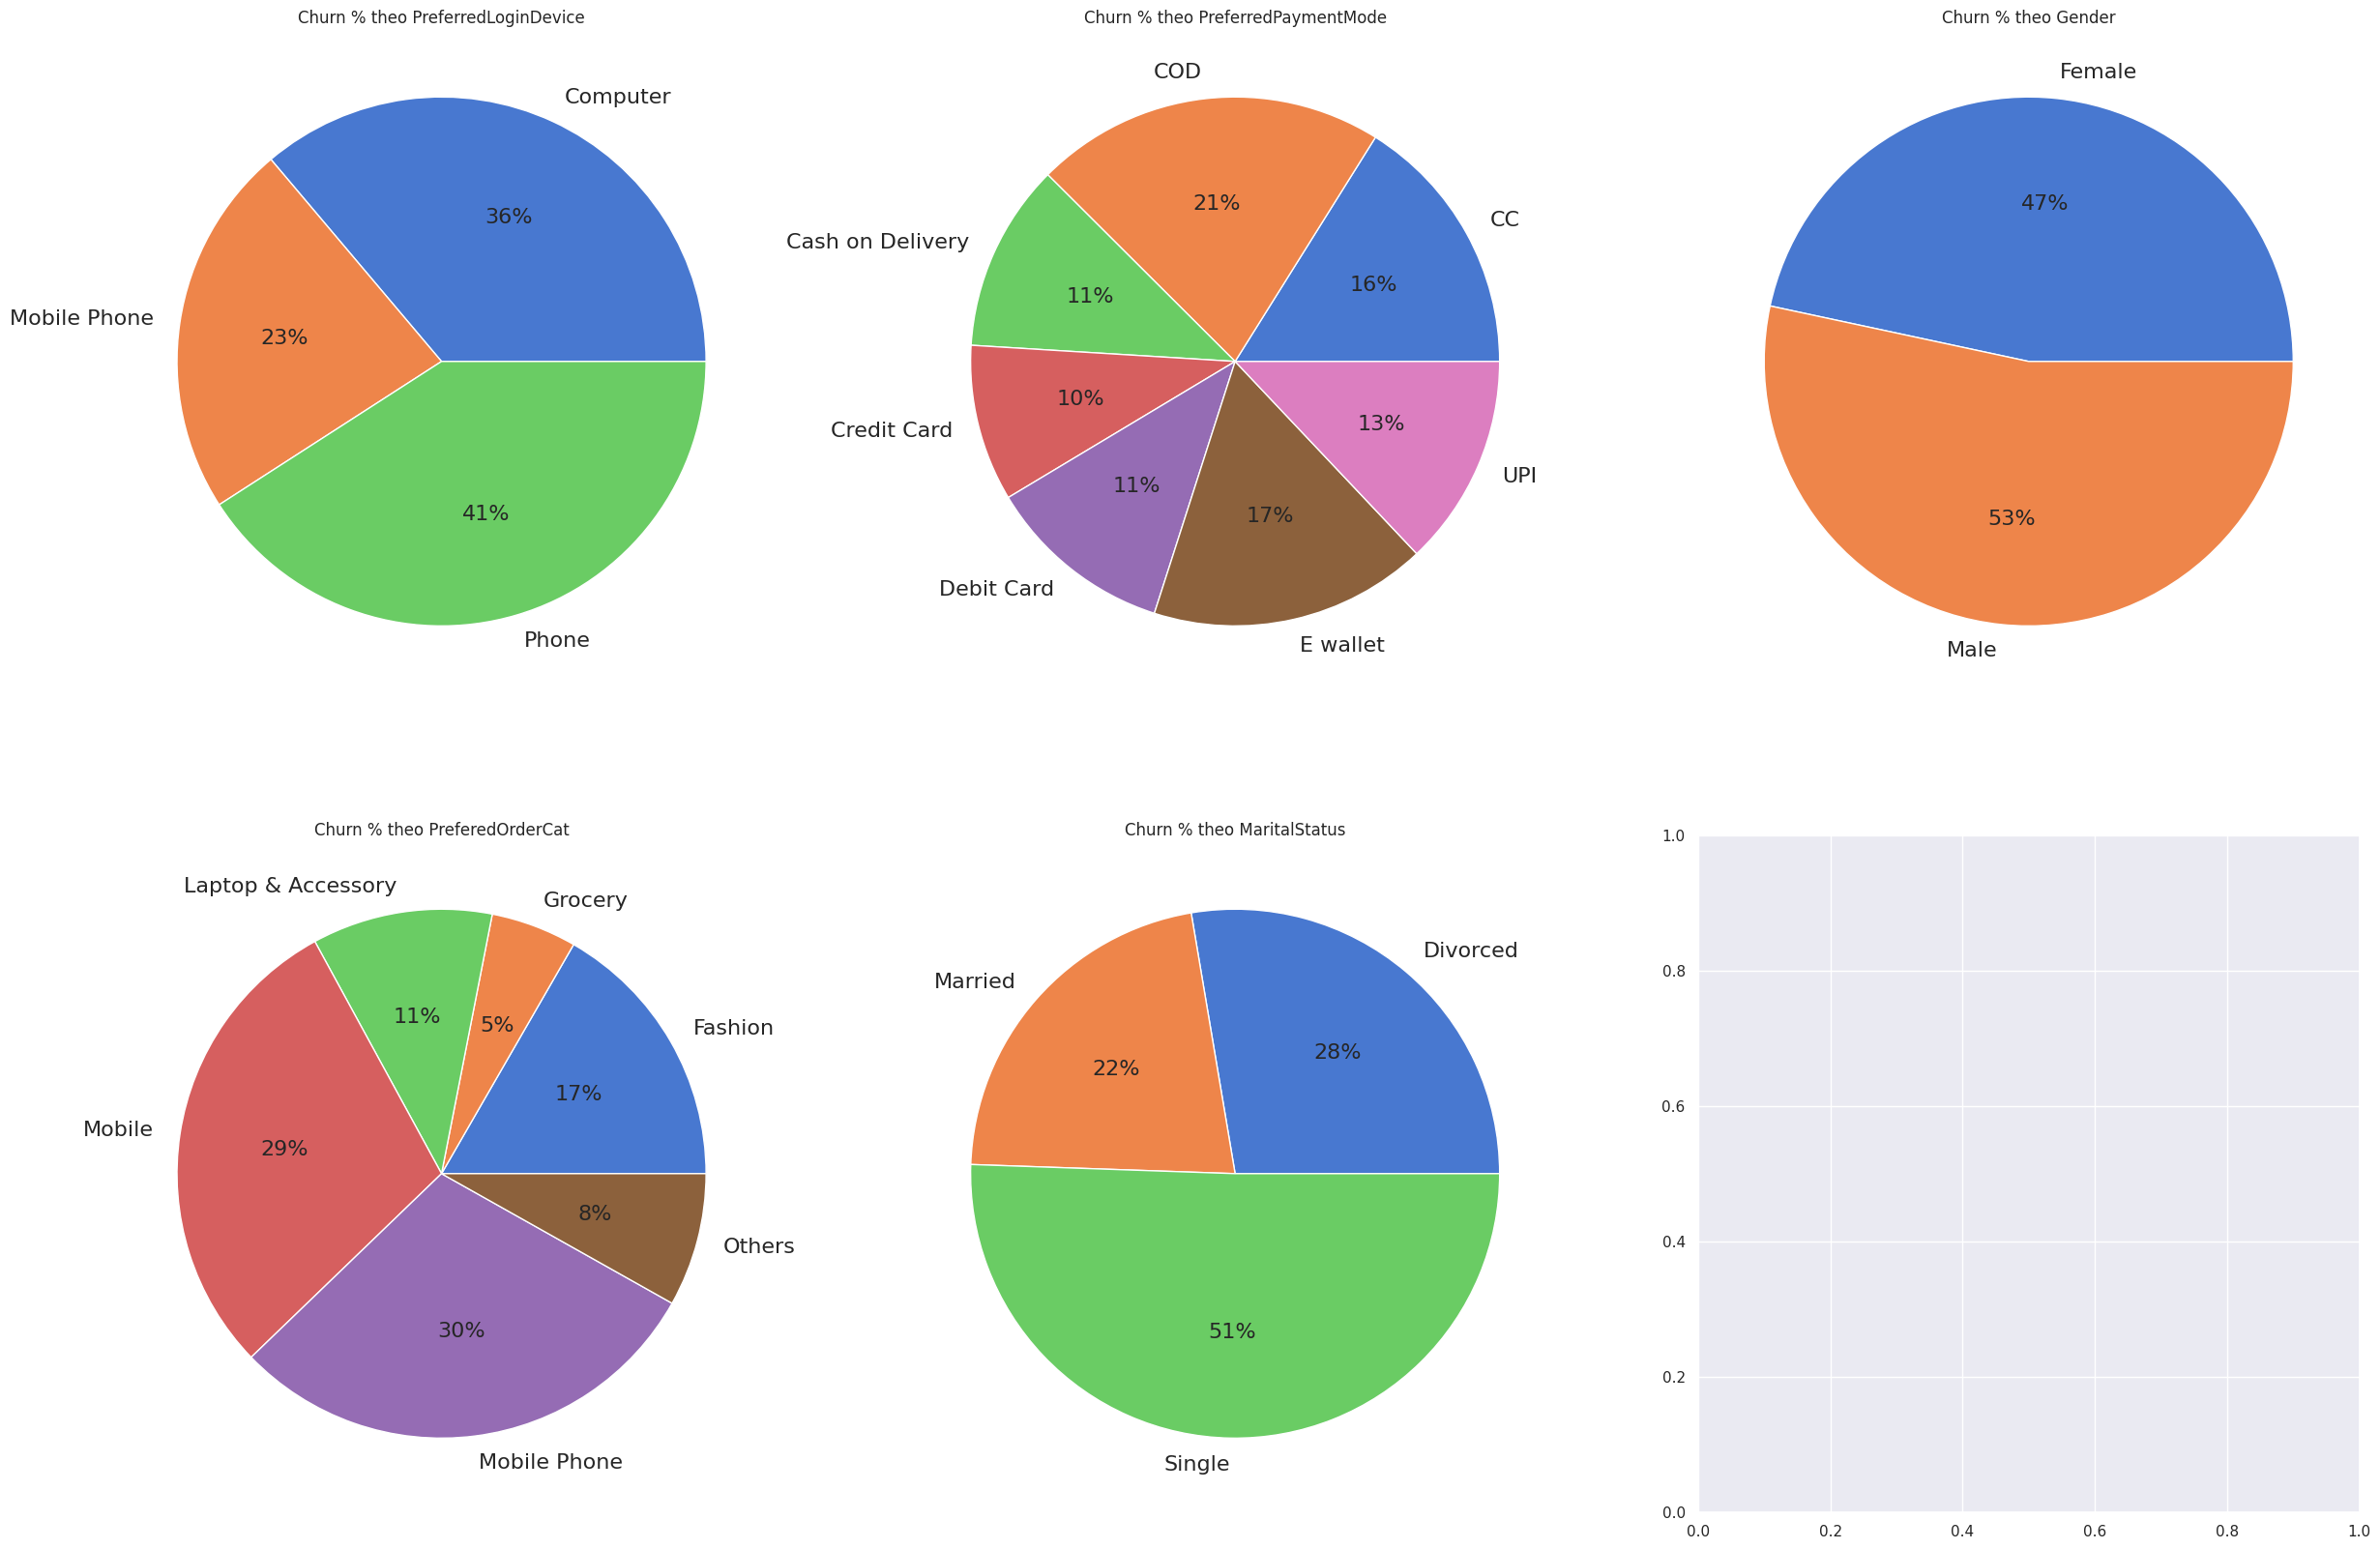

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = 16
for col, subplot in zip(cat, ax.flatten()):
    churn_count = df.groupby(col)['Churn'].sum()
    total_count = df[col].value_counts().sort_index()
    churn_rate = (churn_count / total_count) * 100
    subplot.pie(
        labels=churn_rate.index,
        x=churn_rate.values,
        autopct='%.0f%%',
        textprops={'fontsize': 16}
    )
    subplot.set_title(f"Churn % theo {col}")


In [ ]:
df_encoded = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'PreferredLoginDevice'])
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])

In [ ]:
df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone
0,0,20.0,3,7.0,0,4.0,4,5,3,0,...,False,False,False,False,False,True,False,False,True,False
1,0,13.0,1,9.0,0,4.0,4,3,2,0,...,False,False,False,False,False,False,True,True,False,False
2,0,16.0,3,7.0,1,3.0,4,3,3,0,...,True,False,False,False,True,False,False,False,True,False
3,0,5.0,1,16.0,1,3.0,4,4,3,0,...,False,False,False,False,False,True,False,False,True,False
4,0,9.0,1,28.0,0,3.0,4,2,3,1,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,61.0,3,28.0,0,4.0,4,1,6,1,...,False,False,False,False,False,True,False,False,True,False
5626,0,23.0,1,9.0,1,3.0,4,1,5,0,...,False,False,False,True,False,True,False,True,False,False
5627,0,29.0,2,33.0,1,4.0,2,4,6,1,...,False,False,False,True,False,True,False,False,True,False
5628,0,13.0,1,16.0,1,3.0,4,1,4,0,...,False,False,False,True,False,False,True,True,False,False


In [ ]:
x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)
y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)


In [ ]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
train_balanced_acc = balanced_accuracy_score(y_train, y_pred_train)
test_balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Training Balanced Accuracy: {train_balanced_acc:.4f}')
print(f'Test Balanced Accuracy: {test_balanced_acc:.4f}')

Training Accuracy: 1.0000
Test Accuracy: 0.9574
Training Balanced Accuracy: 1.0000
Test Balanced Accuracy: 0.9002


In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model and find the best parameters
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Params:", grid_search.best_params_)

Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluate the best model found by GridSearchCV
best_clf = grid_search.best_estimator_
# Predict on the training and test sets
y_train_best_pred = best_clf.predict(x_train)
y_test_best_pred = best_clf.predict(x_test)

# Calculate balanced accuracy for both train and test sets
train_balanced_accuracy_best = balanced_accuracy_score(y_train, y_train_best_pred)
test_balanced_accuracy_best = balanced_accuracy_score(y_test, y_test_best_pred)

# Print the results
print("Train accuracy: ", train_balanced_accuracy_best)
print("Test accuracy: ", test_balanced_accuracy_best)

Train accuracy:  1.0
Test accuracy:  0.8920185997716009


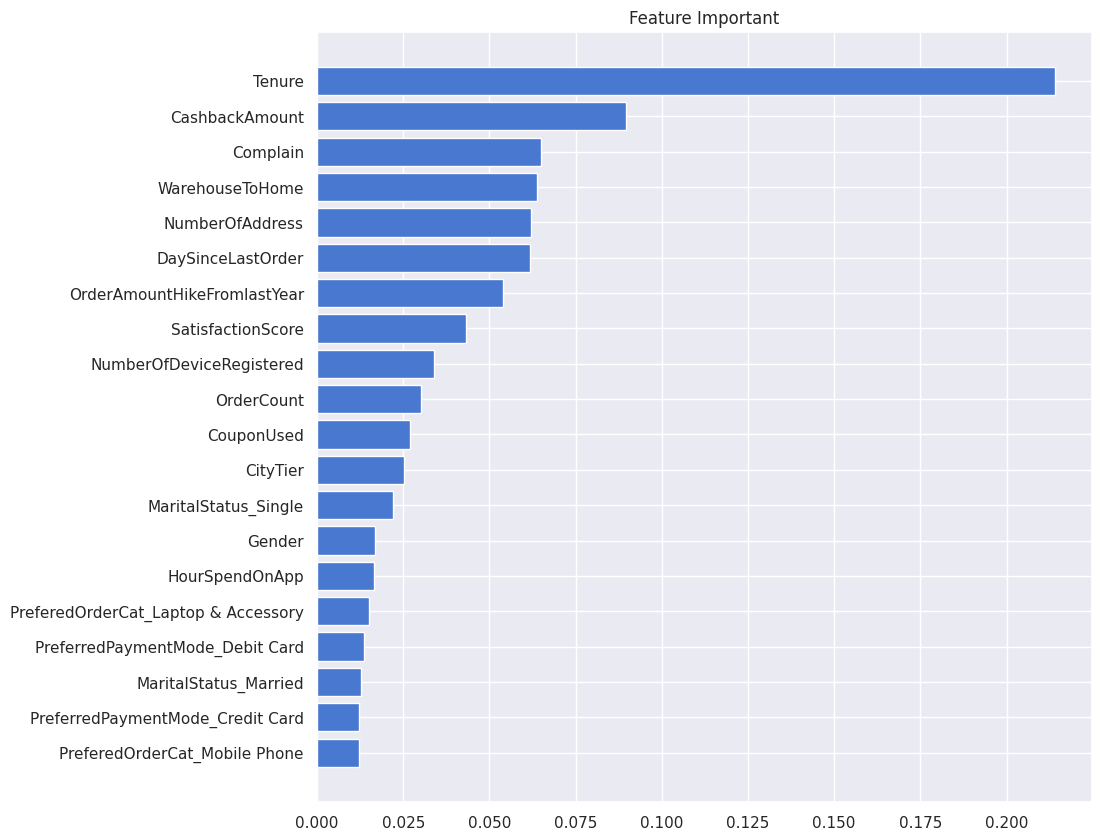

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, best_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

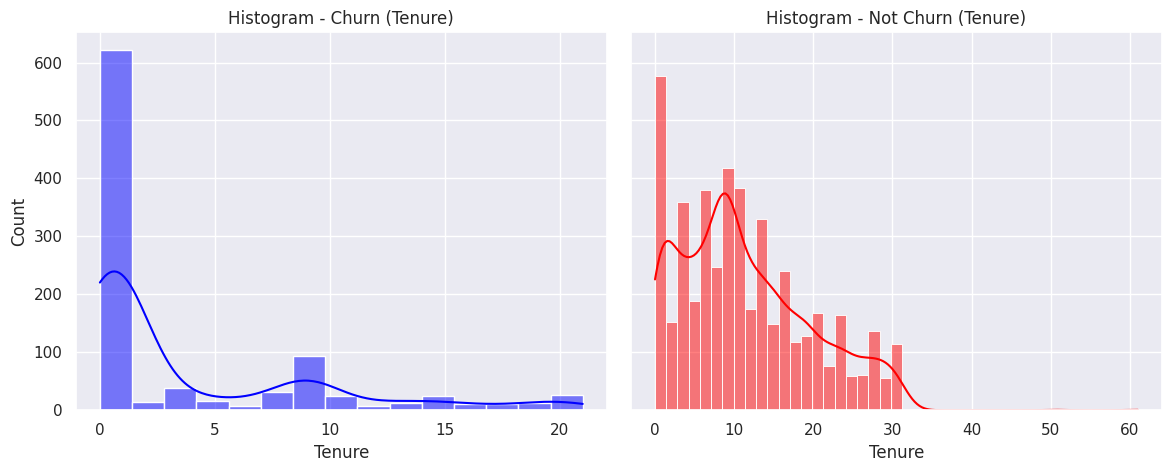

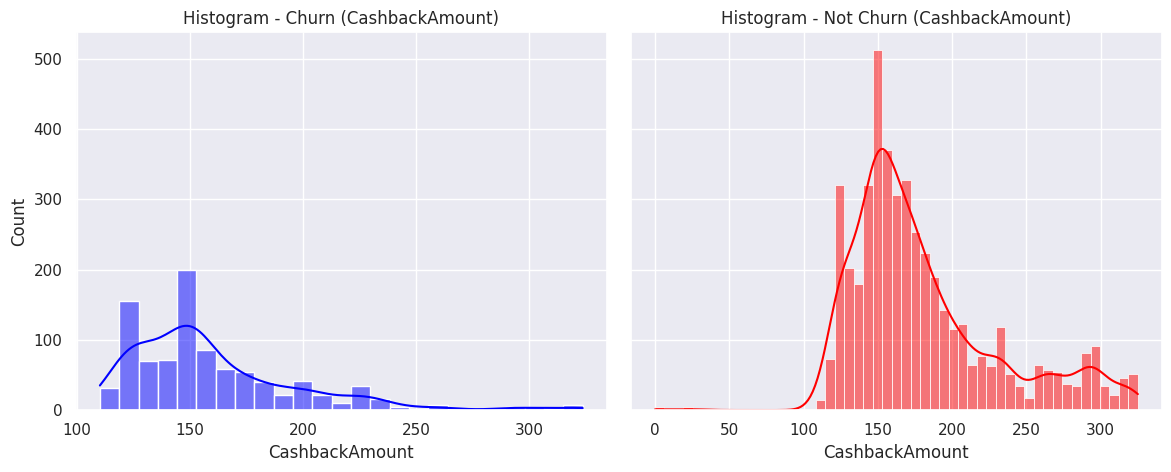

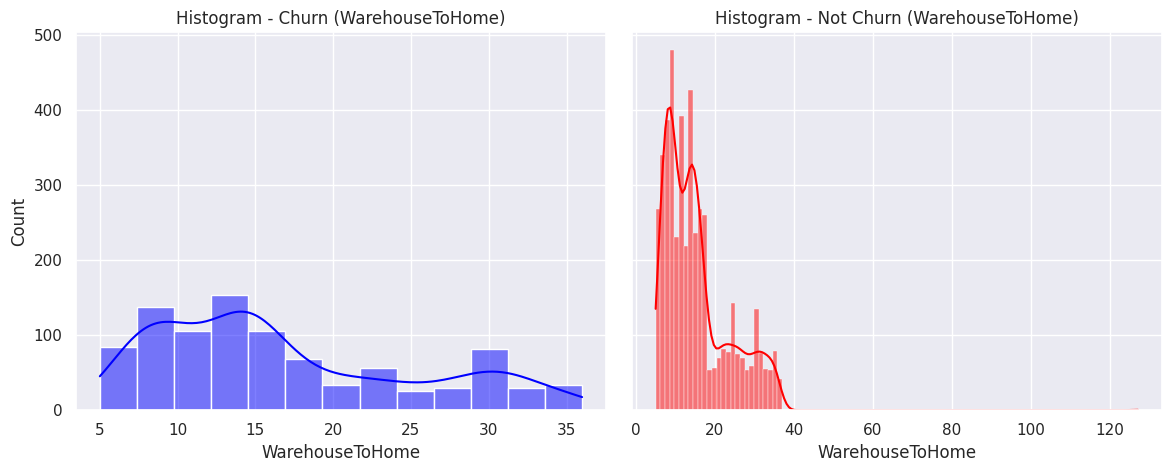

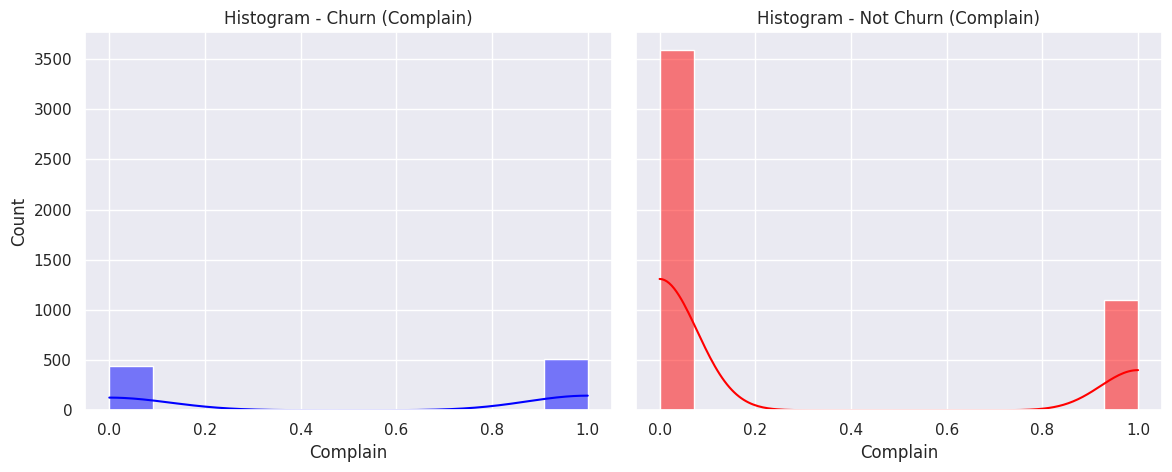

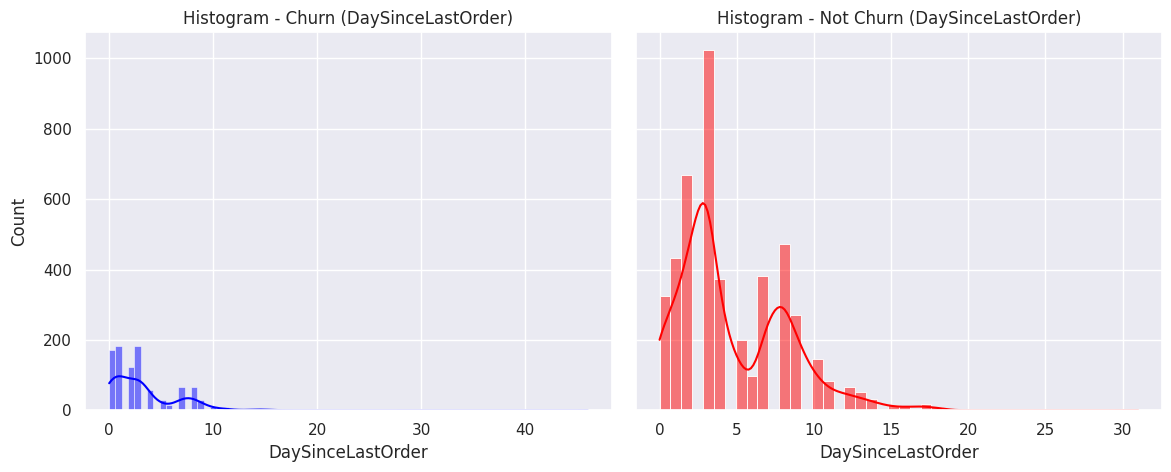

In [ ]:


def plot_hist(df, group_column, feature_column, kde=True):
    for column in feature_column:
        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

        # Filter data for churned and not churned users
        churned_data = df[df[group_column] == 1][column]
        not_churned_data = df[df[group_column] == 0][column]

        # Calculate histogram bins for each group
        bins_churned = np.histogram(churned_data, bins='auto')[1]
        not_bins_churned = np.histogram(not_churned_data, bins='auto')[1]

        # Plot histograms with KDE (Kernel Density Estimation)
        sns.histplot(churned_data, bins=bins_churned, kde=kde, color='blue', ax=axes[0])
        axes[0].set_title(f'Histogram - Churn ({column})')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Count')

        sns.histplot(not_churned_data, bins=not_bins_churned, kde=kde, color='red', ax=axes[1])
        axes[1].set_title(f'Histogram - Not Churn ({column})')
        axes[1].set_xlabel(column)
        axes[1].set_ylabel('Count')

        # Adjust layout and display plots
        plt.tight_layout()
        plt.show()

# Define the list of feature columns
feature_column = ["Tenure", "CashbackAmount", "WarehouseToHome", "Complain", "DaySinceLastOrder"]

# Call the function to plot histograms for churned and non-churned users
plot_hist(df, "Churn", feature_column, kde=True)

| **Metric** | **Churn (Màu Xanh)** | **Non-Churn (Màu Đỏ)** | **Insight** |
|------------|-----------------------|---------------------------|--------------|
| **Tenure (Thời gian gắn bó)** | 80% rời đi trong vòng 5 tháng, rất ít ở lại quá 10 tháng | Phân bố đều hơn, nhiều khách ở lại trên 20 tháng | **Khách hàng churn rời đi rất sớm**, nghĩa là trải nghiệm ban đầu rất quan trọng. Không có chiến lược giữ chân hiệu quả, họ sẽ rời đi nhanh chóng. |
| **CashbackAmount (Tiền hoàn nhận được)** | Trung bình khoảng 100–200, phân bố rộng | Chủ yếu tập trung 120–250 | **Khách churn nhận ít cashback hơn**, khiến lợi ích tài chính cảm nhận được thấp. Nên tăng cashback hoặc tạo ưu đãi thay thế để cải thiện giữ chân. |
| **WarehouseToHome (Thời gian giao hàng)** | Phân bố rộng, trung bình 15–30 ngày, nhiều đơn vượt 35 ngày | Chủ yếu dưới 20 ngày, hiếm khi quá 25 ngày | **Thời gian giao hàng dài liên quan đến churn cao**. Tối ưu logistics và giảm thời gian vận chuyển có thể cải thiện retention. |
| **Complain (Khiếu nại của khách hàng)** | Hai cực: hoặc 0 hoặc 1, tỷ lệ ~50%-50% | Tương tự nhưng phần lớn khách không khiếu nại, khiếu nại chỉ khoảng 10–15% | **Khách churn có tỷ lệ khiếu nại cao hơn**, nhưng cũng nhiều người rời đi mà không khiếu nại. Cho thấy cần chủ động tiếp cận khách hàng bất mãn thay vì chờ họ phản hồi. |
| **DaySinceLastOrder (Số ngày từ lần đặt hàng cuối)** | Phân bố rộng, nhiều người >10 ngày, nhiều trường hợp vượt 20 ngày | Thường dưới 10 ngày, hiếm khi quá 15 ngày | **Khách churn đặt hàng ít thường xuyên hơn**. Nếu họ không mua trong thời gian dài, nguy cơ churn cao. Nên có chiến dịch thúc đẩy mua lại như giảm giá cho lần mua tiếp theo. |



**KEY MAIN**

**Recommendation**


**1.Cải thiện Trải Nghiệm Ban Đầu của Khách Hàng**

Vấn đề: 80% khách hàng churn rời đi trong vòng 5 tháng đầu.

Giải pháp:
Triển khai chương trình chào mừng (email onboarding, hướng dẫn sử dụng, live chat hỗ trợ).
Cung cấp ưu đãi cho lần mua đầu (giảm giá, đặc quyền thành viên).
Đưa ra gợi ý sản phẩm cá nhân hóa để tăng tương tác.

**2.Tối Ưu Chương Trình Hoàn Tiền & Khách Hàng Thân Thiết**

Vấn đề: Khách hàng churn nhận hoàn tiền thấp hơn, làm giảm cảm nhận giá trị.
Giải pháp:

Áp dụng chương trình hoàn tiền theo bậc (chi tiêu nhiều → hoàn tiền cao).

Tạo bonus giới hạn thời gian để thúc đẩy mua lại.

Cung cấp phần thưởng thay thế như miễn phí vận chuyển hoặc giảm giá độc quyền.

**3.Cải Thiện Tốc Độ Giao Hàng & Logistics**

**Vấn đề: Thời gian giao hàng dài làm tăng nguy cơ churn.**

Giải pháp:
  Tối ưu vị trí kho để xử lý đơn nhanh hơn.

  Hợp tác thêm nhiều đơn vị vận chuyển để tăng tốc độ giao hàng.

  Cung cấp tracking theo thời gian thực và dự đoán ngày giao cụ thể.

**Chủ Động Xử Lý Khiếu Nại & Bất Mãn của Khách Hàng**

**Vấn đề: Khách hàng không hài lòng hoặc khiếu nại nhiều, hoặc im lặng rời đi.**
Giải pháp:

Sử dụng chatbot AI hoặc đội chăm sóc khách hàng chuyên trách để xử lý sớm.

Đưa ra bồi thường (giảm giá, tặng phẩm, giao nhanh) trước khi khách rời bỏ.

Ứng dụng phân tích cảm xúc để dự đoán bất mãn và phản ứng kịp thời.

**Khuyến Khích Mua Hàng Thường Xuyên Hơn**

**Vấn đề: Khoảng cách giữa các lần đặt hàng càng dài → nguy cơ churn càng cao.**

Giải pháp:

Tạo ưu đãi giới hạn thời gian (ví dụ: “Giảm 10% nếu mua lại trong 7 ngày”).

Gửi email nhắc nhở cá nhân hóa kèm theo khuyến mãi.

Triển khai mô hình subscription cho các sản phẩm mua lặp lại.

# **II. Question 2.**

In [ ]:
# Select top features affecting Churn
top_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder']
x_1 = df[top_features]
y_1 = df['Churn']

# Split: 70% train, 30% temp (val + test)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_1, y_1, test_size=0.3, random_state=42)

# Split temp into 15% val, 15% test
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_val1, y_val1, test_size=0.5, random_state=42)

# Check dataset sizes
print(f"Train: {x_train1.shape}, Val: {x_val1.shape}, Test: {x_test1.shape}")

Train: (3941, 5), Val: (844, 5), Test: (845, 5)


In [ ]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_val1_scaled = scaler.transform(x_val1)
x_test1_scaled = scaler.transform(x_test1)


In [ ]:
# Random Forest model with 100 trees and max depth of 15
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
clf_rf.fit(x_train1_scaled, y_train1)
y_pred_val_rf = clf_rf.predict(x_val1_scaled)
recall_RF = recall_score(y_val1, y_pred_val_rf)
print('The Recall of Random Forest Model is', recall_RF)

The Recall of Random Forest Model is 0.697986577181208


In [ ]:
# The KNN model
knn = KNeighborsClassifier()
knn.fit(x_train1_scaled, y_train1)
y_pred_val_knn = knn.predict(x_val1_scaled)
recall_KNN = recall_score(y_val1, y_pred_val_knn)
print('The Recall of KNN Model is', recall_KNN)


The Recall of KNN Model is 0.4697986577181208


In [ ]:
# The XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train1_scaled, y_train1)
y_pred_val_xgb = xgb_model.predict(x_val1_scaled)
recall_XGB = recall_score(y_val1, y_pred_val_xgb)
print('The Recall of GBoost Model is', recall_XGB)


The Recall of GBoost Model is 0.6241610738255033


In [ ]:
#The Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train1_scaled, y_train1)
y_pred_val_gb = gb_model.predict(x_val1_scaled)
recall_GB = recall_score(y_val1, y_pred_val_gb)
print('The Recall of Gradient GBoost Model is', recall_GB)

The Recall of Gradient GBoost Model is 0.5167785234899329


In [ ]:
# Initialize Logistic Regression model
clf_lr = LogisticRegression()

# Train the model using the scaled training data
clf_lr.fit(x_train1_scaled, y_train1)

# Predict on the validation set
y_pred_val_lr = clf_lr.predict(x_val1_scaled)

# Evaluate model performance using recall score
recall_LR = recall_score(y_val1, y_pred_val_lr)
print('The Recall of Logistic Regression is', recall_LR)

The Recall of Logistic Regression is 0.3288590604026846


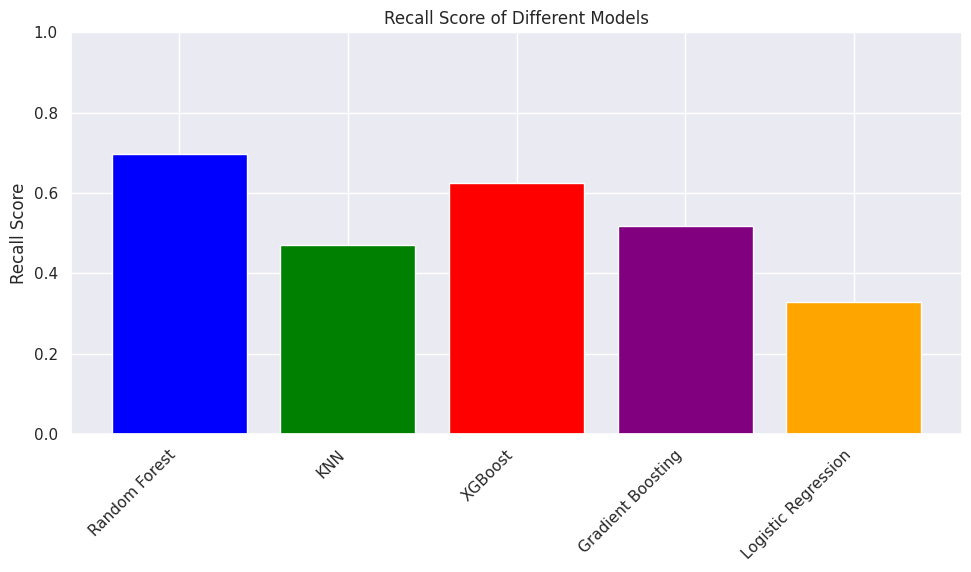

In [ ]:
recall_scores = {
    'Random Forest': recall_RF,
    'KNN': recall_KNN,
    'XGBoost': recall_XGB,
    'Gradient Boosting': recall_GB,
    'Logistic Regression': recall_LR
}
plt.figure(figsize=(10, 6))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Recall Score')
plt.title('Recall Score of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# # Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True],
    'class_weight': ['balanced', None]
}
rf_finetune = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')
rf_finetune.fit(x_train1_scaled, y_train1)
print("Best parameters found:", rf_finetune.best_params_)
print("Best recall score:", rf_finetune.best_score_)

Best parameters found: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best recall score: 0.7863685152057245


In [ ]:
best_model_1 = rf_finetune.best_estimator_
y1_pred_test = best_model_1.predict(x_test1_scaled)
recall_test = recall_score(y_test1, y1_pred_test)
print(f"Recall on the test set: {recall_test:.4f}")


Recall on the test set: 0.7647


In [ ]:
precision_test = precision_score(y_test1, y1_pred_test)
f1_test = f1_score(y_test1, y1_pred_test)
print(f"Precision: {precision_test:.4f}")
print(f"F1-score: {f1_test:.4f}")


Precision: 0.6000
F1-score: 0.6724


In [ ]:
# Calculate the confusion matrix on the test set
cm = confusion_matrix(y_test1, y1_pred_test)

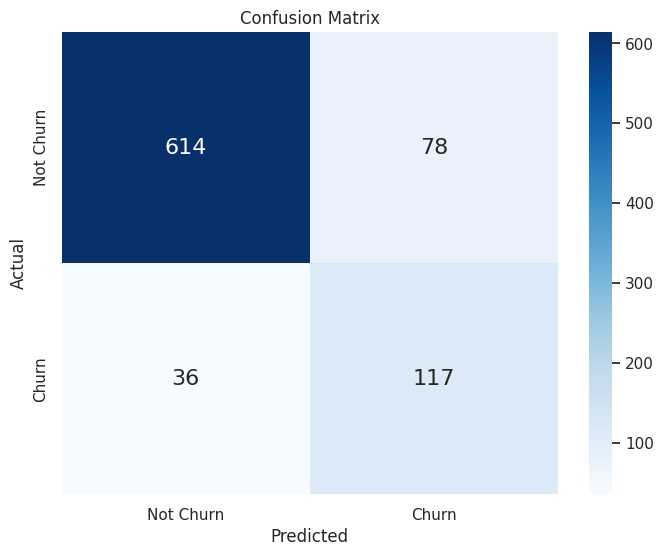

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **QUESTION 3**

In [ ]:
# Filter 'Churn' data
df_churned = df[df['Churn'] == 1].copy()
print(f"Số lượng khách hàng churned: {df_churned.shape[0]}")
df_churned.head()

Số lượng khách hàng churned: 948


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,1,9.0,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,1,9.0,Computer,1,16.0,CC,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


In [ ]:
# One-hot encoding
df_churned_encoded = pd.get_dummies(df_churned,
                                    columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'])
# Label encoding
le = LabelEncoder()
df_churned_encoded.loc[:, 'Gender'] = le.fit_transform(df_churned_encoded['Gender'])

In [ ]:
scaler = RobustScaler()
df_churned_final = scaler.fit_transform(df_churned_encoded)

In [ ]:
pca = PCA(n_components=0.90)
pca_final = pca.fit_transform(df_churned_final)
print(f'Number of principal components retained: {pca_final.shape[1]}')
pca.explained_variance_ratio_


Number of principal components retained: 16


array([0.38167227, 0.08321669, 0.06167053, 0.05293097, 0.04123027,
       0.0387415 , 0.03466074, 0.03255348, 0.03077911, 0.02989837,
       0.02602544, 0.02239421, 0.01993258, 0.01852427, 0.01677244,
       0.01602366])

In [ ]:
pca_df = pd.DataFrame(pca_final, columns=[f"col{i+1}" for i in range(pca_final.shape[1])])
pca_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
0,-0.320091,1.230884,-0.412723,2.188197,0.965142,-0.569724,0.327800,0.296645,-0.353594,-0.314881,-0.124490,-0.476770,-0.348787,-0.149981,-0.571441,0.176779
1,-1.082365,0.717141,-0.224172,2.164612,1.156613,-0.555326,0.589577,0.234897,-0.328082,-0.273746,-0.085569,-0.493660,-0.369128,-0.165868,-0.612829,0.174636
2,-1.568130,1.104648,-0.081277,0.961444,1.601368,-0.799098,-0.423239,0.663032,-0.638962,-0.175559,-0.215036,-0.532640,-0.512675,0.058098,-0.304729,0.525351
3,-2.330404,0.590905,0.107275,0.937859,1.792839,-0.784700,-0.161462,0.601284,-0.613451,-0.134423,-0.176116,-0.549530,-0.533016,0.042211,-0.346117,0.523208
4,0.492212,-0.420501,0.077625,2.162707,-0.072264,-0.997297,-0.117534,0.667516,-0.724153,-0.778850,0.433582,-0.746166,0.459594,-0.402963,-0.355800,-0.505429


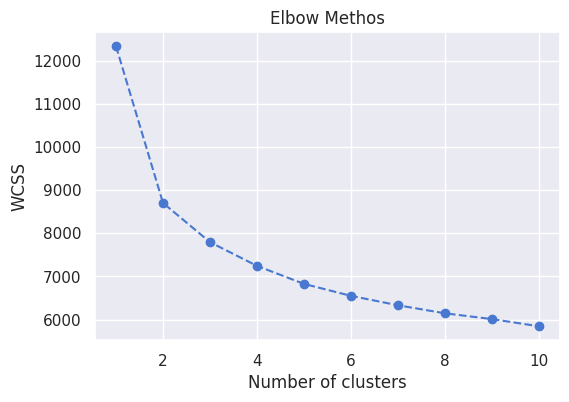

In [ ]:
from sklearn.cluster import KMeans
ss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, init='k-means++')
  kmeans.fit(pca_df)
  ss.append(kmeans.inertia_)

plt.figure(figsize = (6,4))
plt.plot(range(1,11), ss, marker='o', linestyle='--')
plt.title('Elbow Methos')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Chọn K=4**

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++')
predicted_labels = kmeans.fit_predict(pca_df)
pca_df['cluster'] = predicted_labels
df_churned_encoded['cluster'] = predicted_labels
df_churned['cluster'] = predicted_labels


In [ ]:
sil_score = silhouette_score(pca_df, predicted_labels)
print(sil_score)

0.2041913600255242


/tmp/ipython-input-4089888500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_churned["cluster"], palette='coolwarm')


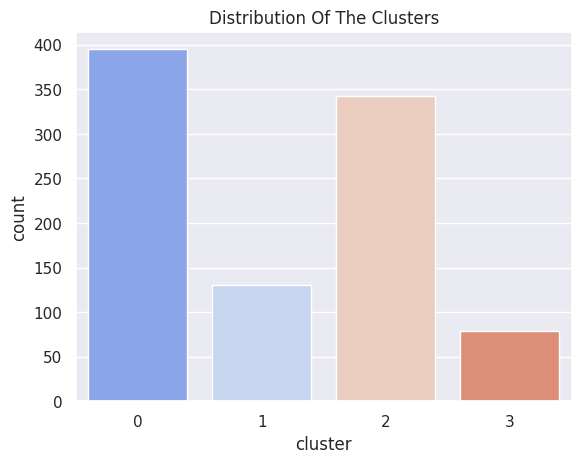

In [ ]:
pl = sns.countplot(x=df_churned["cluster"], palette='coolwarm')
pl.set_title("Distribution Of The Clusters")
plt.show()

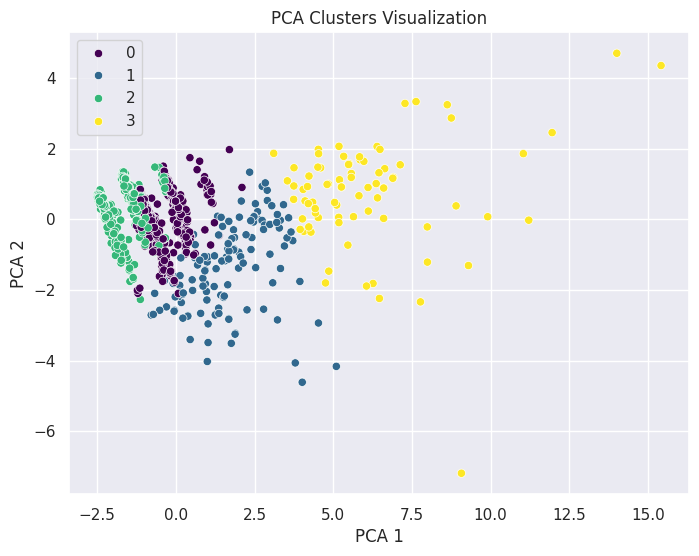

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df.values[:,0], y=pca_df.values[:,1], hue=predicted_labels, palette='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Clusters Visualization")
plt.show()


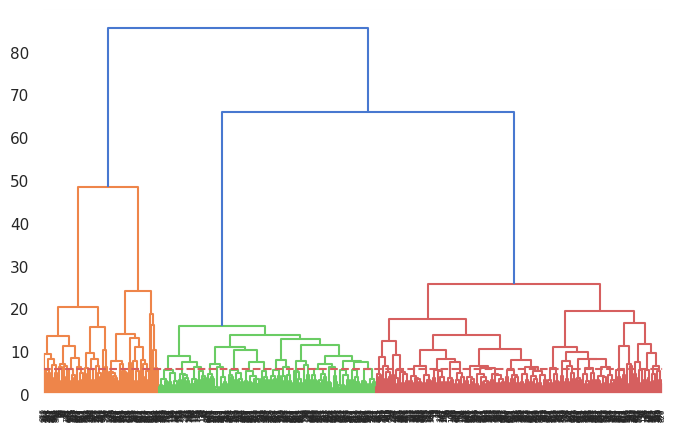

In [96]:
X_pca = pca_df.values

# Draw dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

Silhouette Score: 0.2644519772640823


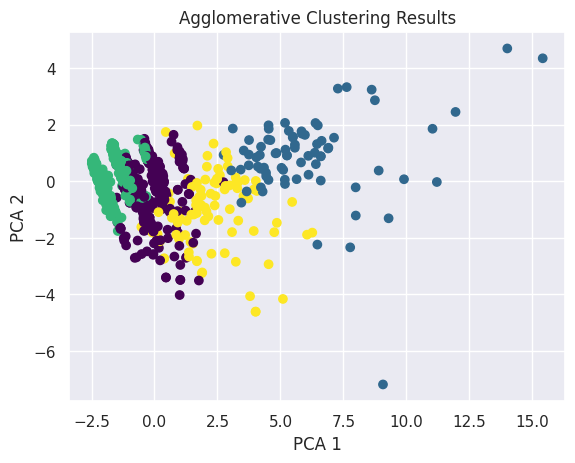

In [98]:
# Apply Agglomerative Clustering with 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)
clusters = agg_clustering.fit_predict(pca_df)

# Calculate the Silhouette Score
sil_score = silhouette_score(pca_df, clusters)
print(f"Silhouette Score: {sil_score}")

# Visualize the clusters (if pca_df is 2D or 3D)
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()